In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# New york data
"""
=>Ensure that selerium is properly installed in your system and the correct 
  path is used.

=>Don't close the window created! 
"""

newyork="https://www.truecar.com/used-cars-for-sale/listings/bmw/x7/location-new-york-ny/"
def scrapper(url):
    driver = webdriver.Chrome("/usr/bin/chromedriver")
    products=[] #List to store name of the cars
    prices=[] #List to store price of the cars
    locations=[] #List to store location of the car
    
    driver.get(url)
    content = driver.page_source
    soup=bs(content,'html.parser')
    for a in soup.findAll('div',attrs={'class':'_1qd1muk'}):
        name=a.find('span',attrs={'class':'vehicle-header-make-model'})
        price=a.find('div', attrs={'class':'heading-3'})
        location=a.find('div', attrs={'class':'vehicle-card-location'})
        if None in (name,price,location):
            continue
        products.append(name.text.strip())
        prices.append(price.text.strip())
        locations.append(location.text.strip())
        
    df = pd.DataFrame({'Product Name':products,'Price':prices,'location':locations}) 
    
    #converting currency to propper digits
    pricelst=df['Price'].values.tolist()
    df['Price']=[int(''.join(x.replace(',','').split()).replace('$','')) for x in pricelst]
    
    #uncomment to save the dataset afresh
    df.to_csv('products.csv', index=False, encoding='utf-8') #optional saving the df
    print(df)
    return df
df_ny=scrapper(newyork)

   Product Name  Price                  location
0        BMW X7  67997    26 mi - Morristown, NJ
1        BMW X7  62985       15 mi - Yonkers, NY
2        BMW X7  78925  21 mi - White Plains, NY
3        BMW X7  76855  21 mi - White Plains, NY
4        BMW X7  82789    68 mi - Doylestown, PA
5        BMW X7  94995        28 mi - Edison, NJ
6        BMW X7  79988      22 mi - Westbury, NY
7        BMW X7  67895         9.5 mi - Lodi, NJ
8        BMW X7  69999        22 mi - Ramsey, NJ
9        BMW X7  83800   34 mi - Bridgewater, NJ
10       BMW X7  81780   26 mi - South Amboy, NJ


In [3]:
#loading the dataset
data=pd.read_csv('products.csv')

# Depreciation btwn two cities
def depr(df,city1,city2):
    price1=df['Price'].loc[df['location']==city1]
    price2=df['Price'].loc[df['location']==city2]
    price1=np.mean(price1)
    price2=np.mean(price2)
    depr= (int(np.mean(price1))-int(np.mean(price2)))/int(price1)*100
    print('Use the above tables to make sure the models are the same')
    return depr

#sample ny cities use any two during tests
wp='21 mi - White Plains, NY'
eds='28 mi - Edison, NJ'
doy='68 mi - Doylestown, PA'
lodi='9.5 mi - Lodi, NJ'
print(f"This is a {round(depr(data,wp,eds),2)}% Depriciation")

Use the above tables to make sure the models are the same
This is a -21.96% Depriciation


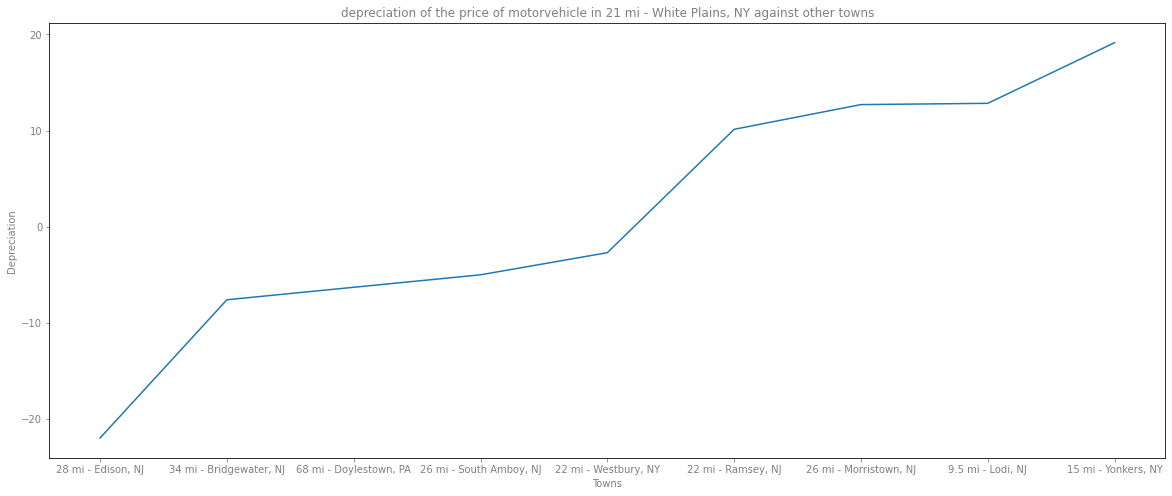

                     Towns  Depreciation
0   26 mi - Morristown, NJ     12.701245
1      15 mi - Yonkers, NY     19.135961
2   68 mi - Doylestown, PA     -6.289639
3       28 mi - Edison, NJ    -21.960457
4     22 mi - Westbury, NY     -2.693542
5        9.5 mi - Lodi, NJ     12.832199
6       22 mi - Ramsey, NJ     10.130954
7  34 mi - Bridgewater, NJ     -7.587624
8  26 mi - South Amboy, NJ     -4.994223


In [4]:
import random
#function to make a plot
def dptplt(df):
    cities=df['location']
    locs=[]
    prices=[]
    for city in cities:
        prices.append(df['Price'].loc[df['location']==city].values.tolist())
        locs.append(city)
    dicto = dict(zip(locs,prices))
    randitm=random.choice(list(dicto.items()))
    price1=np.mean(randitm[1])
    items=[x for x in dicto.items() if x[0] != randitm[0]]
    prices= [np.mean(y) for x,y in items]
    depr= [(int(np.mean(price1))-int(np.mean(x)))/int(price1)*100 for x in prices]
    dprtable=pd.DataFrame({'Towns':[x for x,y in items],'Depreciation':depr})
    #dprtable.set_index('Towns',inplace=True)
    Towns=[dprtable['Towns'].loc[dprtable['Depreciation']==x].values.item() for x in sorted(dprtable.Depreciation)]
    # making Depreciation barplot
    plt.rcParams['figure.figsize'] = [20, 8]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.tick_params(axis='x', colors='gray')
    ax.tick_params(axis='y', colors='gray')
    plt.plot(Towns,sorted(dprtable.Depreciation))
    plt.title(f'depreciation of the price of motorvehicle in {randitm[0]} against other towns',c='gray')
    plt.ylabel('Depreciation',c='gray')
    plt.xlabel('Towns',c='gray')
    plt.show()
    print(dprtable)
dptplt(data)